In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [2]:
sns.set_theme(style="whitegrid")
sns.set_palette("tab10")
matplotlib.rcParams['figure.figsize'] = (10, 5)

In [3]:
df = pd.read_csv('results.csv', sep=';')

In [4]:
list(df.columns)

['BinaryName',
 'IterationID',
 'MaxIteration',
 'CexThreshold',
 'NumCex',
 'RemainingCex',
 'WindowSize',
 'ShortenedCex',
 'AccumulateCex',
 'UsePositiveDiagnosis',
 'UseAllDataForRetraining',
 'RetrainingErrorThreshold',
 'RetrainingTime',
 'TrainingError',
 'TrainedFromScratch',
 'DataLength',
 'CexLength']

In [5]:
df['EliminatedCex'] = df['NumCex'] - df['RemainingCex']

In [6]:
df['EliminationRatio'] = round(((df['EliminatedCex'] / df['NumCex']) * 100), 2)

In [8]:
# ShortenedCex -> S
# AccumulateCex -> A
# UsePositiveDiagnosis -> P/N
# UseAllDataForRetraining - > D
# CexThreshold -> CT
# WindowSize -> WS

def GenerateCaseName(row):
    nn_name = row.BinaryName.split('/')[1]
    nn_name = nn_name.split('.')[0]
    
    shortened = ''
    if row.ShortenedCex:
        shortened = 'S'
        
    accumulate = ''
    if row.AccumulateCex:
        accumulate = 'A'
        
    diagnosis = 'N'
    if row.UsePositiveDiagnosis:
        diagnosis = 'P'
    
    all_data = ''
    if row.UseAllDataForRetraining:
        all_data = 'D'
        
    return f'{nn_name}_{shortened}{accumulate}{diagnosis}{all_data}_CT{row.CexThreshold}_WS{row.WindowSize}'

In [9]:
df['CaseName'] = df.apply(GenerateCaseName, axis=1)

In [10]:
df.head()

,BinaryName,IterationID,MaxIteration,CexThreshold,NumCex,RemainingCex,WindowSize,ShortenedCex,AccumulateCex,UsePositiveDiagnosis,UseAllDataForRetraining,RetrainingErrorThreshold,RetrainingTime,TrainingError,TrainedFromScratch,DataLength,CexLength,EliminatedCex,EliminationRatio,CaseName
0,bin/nn2.mat,1,10,5,5,5,0.0,0,0,0,0,0.01,2.0707,0.000087,0,50025,10005,0,0.0,nn2_N_CT5_WS0.0
1,bin/nn2.mat,2,10,5,5,5,0.0,0,0,0,0,0.01,1.9298,0.000037,0,50025,10005,0,0.0,nn2_N_CT5_WS0.0
2,bin/nn2.mat,3,10,5,5,5,0.0,0,0,0,0,0.01,3.3324,0.000070,0,50025,10005,0,0.0,nn2_N_CT5_WS0.0
3,bin/nn2.mat,4,10,5,5,5,0.0,0,0,0,0,0.01,4.4180,0.000422,0,50025,10005,0,0.0,nn2_N_CT5_WS0.0
4,bin/nn2.mat,5,10,5,5,5,0.0,0,0,0,0,0.01,2.0038,0.000018,0,50025,10005,0,0.0,nn2_N_CT5_WS0.0


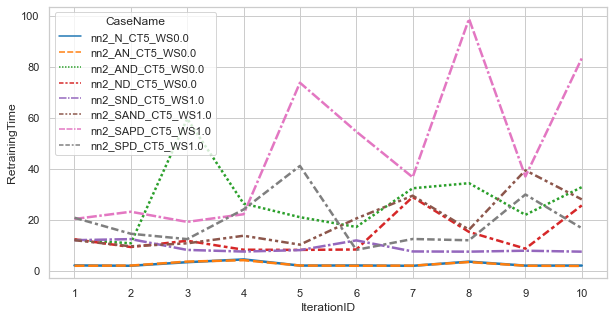

In [13]:
sns.lineplot(data=df, x='IterationID', y='RetrainingTime', hue='CaseName', linewidth=2.5, style="CaseName")
matplotlib.pyplot.xticks(list(range(1,11)))
plt.show()

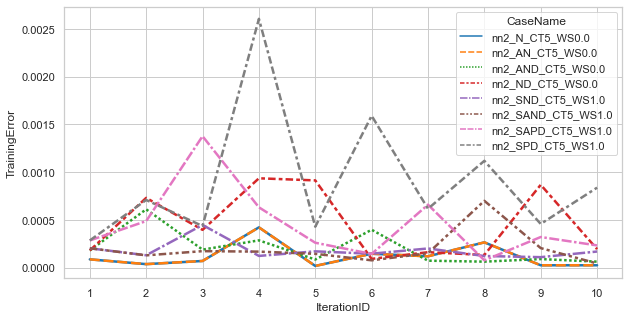

In [14]:
sns.lineplot(data=df, x='IterationID', y='TrainingError', hue='CaseName', linewidth=2.5, style="CaseName")
matplotlib.pyplot.xticks(list(range(1,11)))
plt.show()

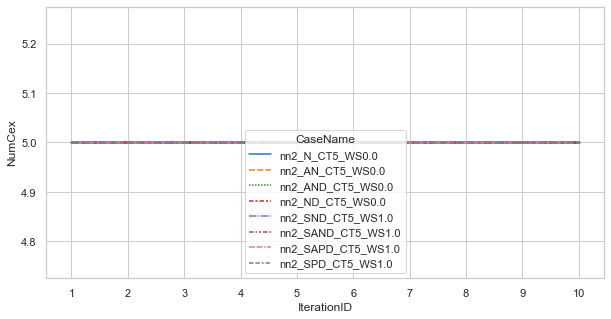

In [15]:
sns.lineplot(data=df, x='IterationID', y='NumCex', hue='CaseName', linewidth=2.5, style="CaseName")
matplotlib.pyplot.xticks(list(range(1,11)))
plt.show()

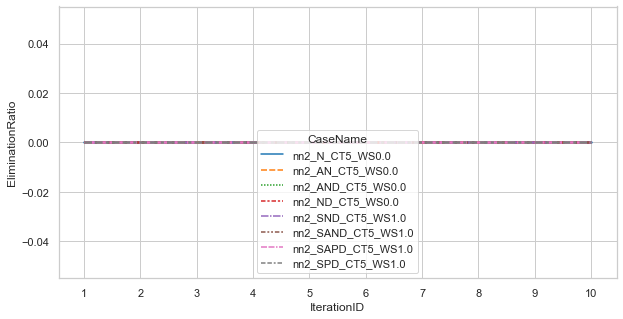

In [16]:
sns.lineplot(data=df, x='IterationID', y='EliminationRatio', hue='CaseName', linewidth=2.5, style="CaseName")
matplotlib.pyplot.xticks(list(range(1,11)))
plt.show()